#### The results are analyzed here for snow density of 40, 100, 200, and 450 kg/m3. 



##### Special case 3 (ces) - Case3_ces suggests the case with daily snow depth (after removing the cumulative effect) and snow density of 40 kg/m^3.  

In [1]:
#import sys
#sys.path.insert(0,'../pestools')

In [2]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/Case3_Ethan_check


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### Reading the observations

In [6]:
df_obs_AWS = pd.read_csv('../datamshapratirupa/1_data_prep/Final_OutputData_4yrs/Validate_outputdata_2019.csv',sep='\t')
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2019-01-01,6.423472,7.538778,8.086528,8.609306,5.178132,3.371944,4.453563,-16.513194,-16.174306,-14.436319,-13.870417,-12.438125,-10.238264,-7.024076,-5.411375
1,2019-01-02,6.463458,7.577208,8.120833,8.615139,5.161292,3.348535,4.425410,-15.900486,-15.641042,-13.958611,-13.513819,-12.308611,-10.330208,-7.259861,-5.616632
2,2019-01-03,6.458368,7.578368,8.129028,8.620347,5.153854,3.329340,4.399389,-16.385139,-15.791528,-14.019931,-13.464583,-12.218889,-10.348611,-7.443604,-5.803431
3,2019-01-04,6.441076,7.562042,8.118333,8.615000,5.151160,3.313813,4.376812,-16.919028,-16.036181,-14.217222,-13.575208,-12.252083,-10.388333,-7.572201,-5.965312
4,2019-01-05,6.434840,7.551556,8.103681,8.597500,5.139132,3.301118,4.357840,-17.339306,-16.176042,-14.359722,-13.716250,-12.376875,-10.484514,-7.692111,-6.111090


In [7]:
df_obs_AWS_III = pd.read_csv('../datamshapratirupa/1_data_prep/Final_OutputData_Case3/Valid_outputdata_Case3_2017.csv',sep='\t')
df_obs_AWS_III.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2017-01-01,8.001889,8.352500,8.502500,8.952083,5.408938,3.765458,5.415479,-12.807778,-12.126736,-11.403750,-10.977778,-9.902153,-8.312083,-5.657743,-4.284076
1,2017-01-02,8.008944,8.363681,8.515347,8.959236,5.403771,3.747493,5.377924,-13.721104,-12.143333,-11.357708,-10.903542,-9.815208,-8.296667,-5.790653,-4.451597
2,2017-01-03,8.001986,8.356250,8.513264,8.958819,5.386264,3.732201,5.312049,-13.513736,-12.295139,-11.472361,-10.965417,-9.805000,-8.309931,-5.898486,-4.594007
3,2017-01-04,8.016035,8.365417,8.515694,8.953472,5.380111,3.718479,5.282632,-12.564931,-12.117292,-11.363750,-10.923194,-9.844306,-8.356181,-5.995306,-4.716979
4,2017-01-05,8.037118,8.386875,8.527569,8.957500,5.374840,3.706326,5.251993,-12.385111,-11.802986,-11.108819,-10.740208,-9.785764,-8.384167,-6.089104,-4.832729


### Reading the results

In [17]:
Case3_sd004 = pd.read_csv('sd004.demo/observations.dat',skiprows=220,sep=' ')
Case3_sd01 = pd.read_csv('sd01.demo/observations.dat',skiprows=220,sep=' ')
Case3_sd02 = pd.read_csv('sd02.demo/observations.dat',skiprows=220,sep=' ')
Case3_sd045 = pd.read_csv('sd045.demo/observations.dat',skiprows=220,sep=' ')

Case3_sd004.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.01 saturation ice,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice
0,0.0,692983.819430,0.0,0.000214,2.193956e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.263148,0.263148,0.746411,0.767491,0.838149,0.837516,0.836668,0.835879,0.832986,0.834790
1,86400.0,692980.370534,0.0,0.000141,1.289223e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.261137,0.261137,0.746216,0.767370,0.838053,0.837544,0.836747,0.835986,0.833007,0.834787
2,172800.0,692977.645762,0.0,0.000101,1.025261e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.259899,0.259899,0.746178,0.767325,0.837986,0.837535,0.836798,0.836078,0.833030,0.834784
3,259200.0,692973.961928,0.0,0.000072,1.266469e-09,0.0,0.0,0.0,1.543208e-10,0.0,...,0.257962,0.257962,0.746045,0.767230,0.837880,0.837504,0.836829,0.836154,0.833054,0.834781
4,345600.0,692969.742189,0.0,0.000044,1.197854e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.255901,0.255901,0.745935,0.767139,0.837768,0.837456,0.836843,0.836214,0.833080,0.834777


In [18]:
Case3_sd01.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.01 saturation ice,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice
0,0.0,692983.819430,0.0,0.000214,2.193956e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.263148,0.263148,0.746411,0.767491,0.838149,0.837516,0.836668,0.835879,0.832986,0.834790
1,86400.0,692980.370534,0.0,0.000141,1.289223e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.261137,0.261137,0.746216,0.767370,0.838053,0.837544,0.836747,0.835986,0.833007,0.834787
2,172800.0,692977.645762,0.0,0.000101,1.025261e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.259899,0.259899,0.746178,0.767325,0.837986,0.837535,0.836798,0.836078,0.833030,0.834784
3,259200.0,692973.979719,0.0,0.000082,1.374667e-09,0.0,0.0,0.0,3.858021e-10,0.0,...,0.257970,0.257970,0.746045,0.767230,0.837880,0.837504,0.836829,0.836154,0.833054,0.834781
4,345600.0,692969.768715,0.0,0.000050,1.252429e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.255913,0.255913,0.745935,0.767139,0.837768,0.837456,0.836843,0.836214,0.833080,0.834777


In [19]:
# Converting seconds to days

Case3_sd004['time [days]'] = Case3_sd004['time [s]']/86400
Case3_sd01['time [days]'] = Case3_sd01['time [s]']/86400
Case3_sd02['time [days]'] = Case3_sd02['time [s]']/86400
Case3_sd045['time [days]'] = Case3_sd045['time [s]']/86400

In [20]:
### Temperature from degree celcius to Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, depth in enumerate(depths):
    Case3_sd004[f'Soil temperature at - {depth} m (°C)'] = Case3_sd004[f'point -{depth} temperature [K]'] - 273.15
    Case3_sd01[f'Soil temperature at - {depth} m (°C)'] = Case3_sd01[f'point -{depth} temperature [K]'] - 273.15
    Case3_sd02[f'Soil temperature at - {depth} m (°C)'] = Case3_sd02[f'point -{depth} temperature [K]'] - 273.15
    Case3_sd045[f'Soil temperature at - {depth} m (°C)'] = Case3_sd045[f'point -{depth} temperature [K]'] - 273.15


Case3_sd045.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,0.0,692983.819430,0.0,0.000214,2.193956e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.832986,0.834790,0.0,-12.942738,-11.602774,-10.636990,-9.708006,-7.817212,-6.055535,-4.873201
1,86400.0,692980.370534,0.0,0.000141,1.289223e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.833007,0.834787,1.0,-10.663168,-10.281747,-9.888866,-9.377162,-7.888179,-6.207547,-5.010842
2,172800.0,692977.645762,0.0,0.000101,1.025261e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.833030,0.834784,2.0,-10.578430,-10.053642,-9.631281,-9.158665,-7.864475,-6.309861,-5.133341
3,259200.0,692974.088693,0.0,0.000139,2.037949e-09,0.0,0.0,0.0,1.736109e-09,0.0,...,0.833054,0.834781,3.0,-9.414866,-9.323858,-9.129376,-8.828028,-7.784281,-6.373937,-5.237937
4,345600.0,692969.931518,0.0,0.000077,1.585975e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,0.833080,0.834777,4.0,-8.796182,-8.790394,-8.691919,-8.495836,-7.664022,-6.403309,-5.322613


In [21]:
### Saturation of liquid to Volumetric Water Content (VWC - %)

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3

poro_peat_3_ces = 0.438661
poro_mineral_3_ces = 0.372766


for i, depth in enumerate(depths):
    if depth < depth_peat:
        Case3_sd004[f'Soil moisture at - {depth} m (%)'] = Case3_sd004[f'point -{depth} saturation liquid']*(poro_peat_3_ces*100)
        Case3_sd01[f'Soil moisture at - {depth} m (%)'] = Case3_sd01[f'point -{depth} saturation liquid']*(poro_peat_3_ces*100)
        Case3_sd02[f'Soil moisture at - {depth} m (%)'] = Case3_sd02[f'point -{depth} saturation liquid']*(poro_peat_3_ces*100)
        Case3_sd045[f'Soil moisture at - {depth} m (%)'] = Case3_sd045[f'point -{depth} saturation liquid']*(poro_peat_3_ces*100)
    else:
        Case3_sd004[f'Soil moisture at - {depth} m (%)'] = Case3_sd004[f'point -{depth} saturation liquid']*(poro_mineral_3_ces*100)
        Case3_sd01[f'Soil moisture at - {depth} m (%)'] = Case3_sd01[f'point -{depth} saturation liquid']*(poro_mineral_3_ces*100)
        Case3_sd02[f'Soil moisture at - {depth} m (%)'] = Case3_sd02[f'point -{depth} saturation liquid']*(poro_mineral_3_ces*100)
        Case3_sd045[f'Soil moisture at - {depth} m (%)'] = Case3_sd045[f'point -{depth} saturation liquid']*(poro_mineral_3_ces*100)

### Plotting the results

### Plotting the results with measured values

Text(0.5, 0, 'Days')

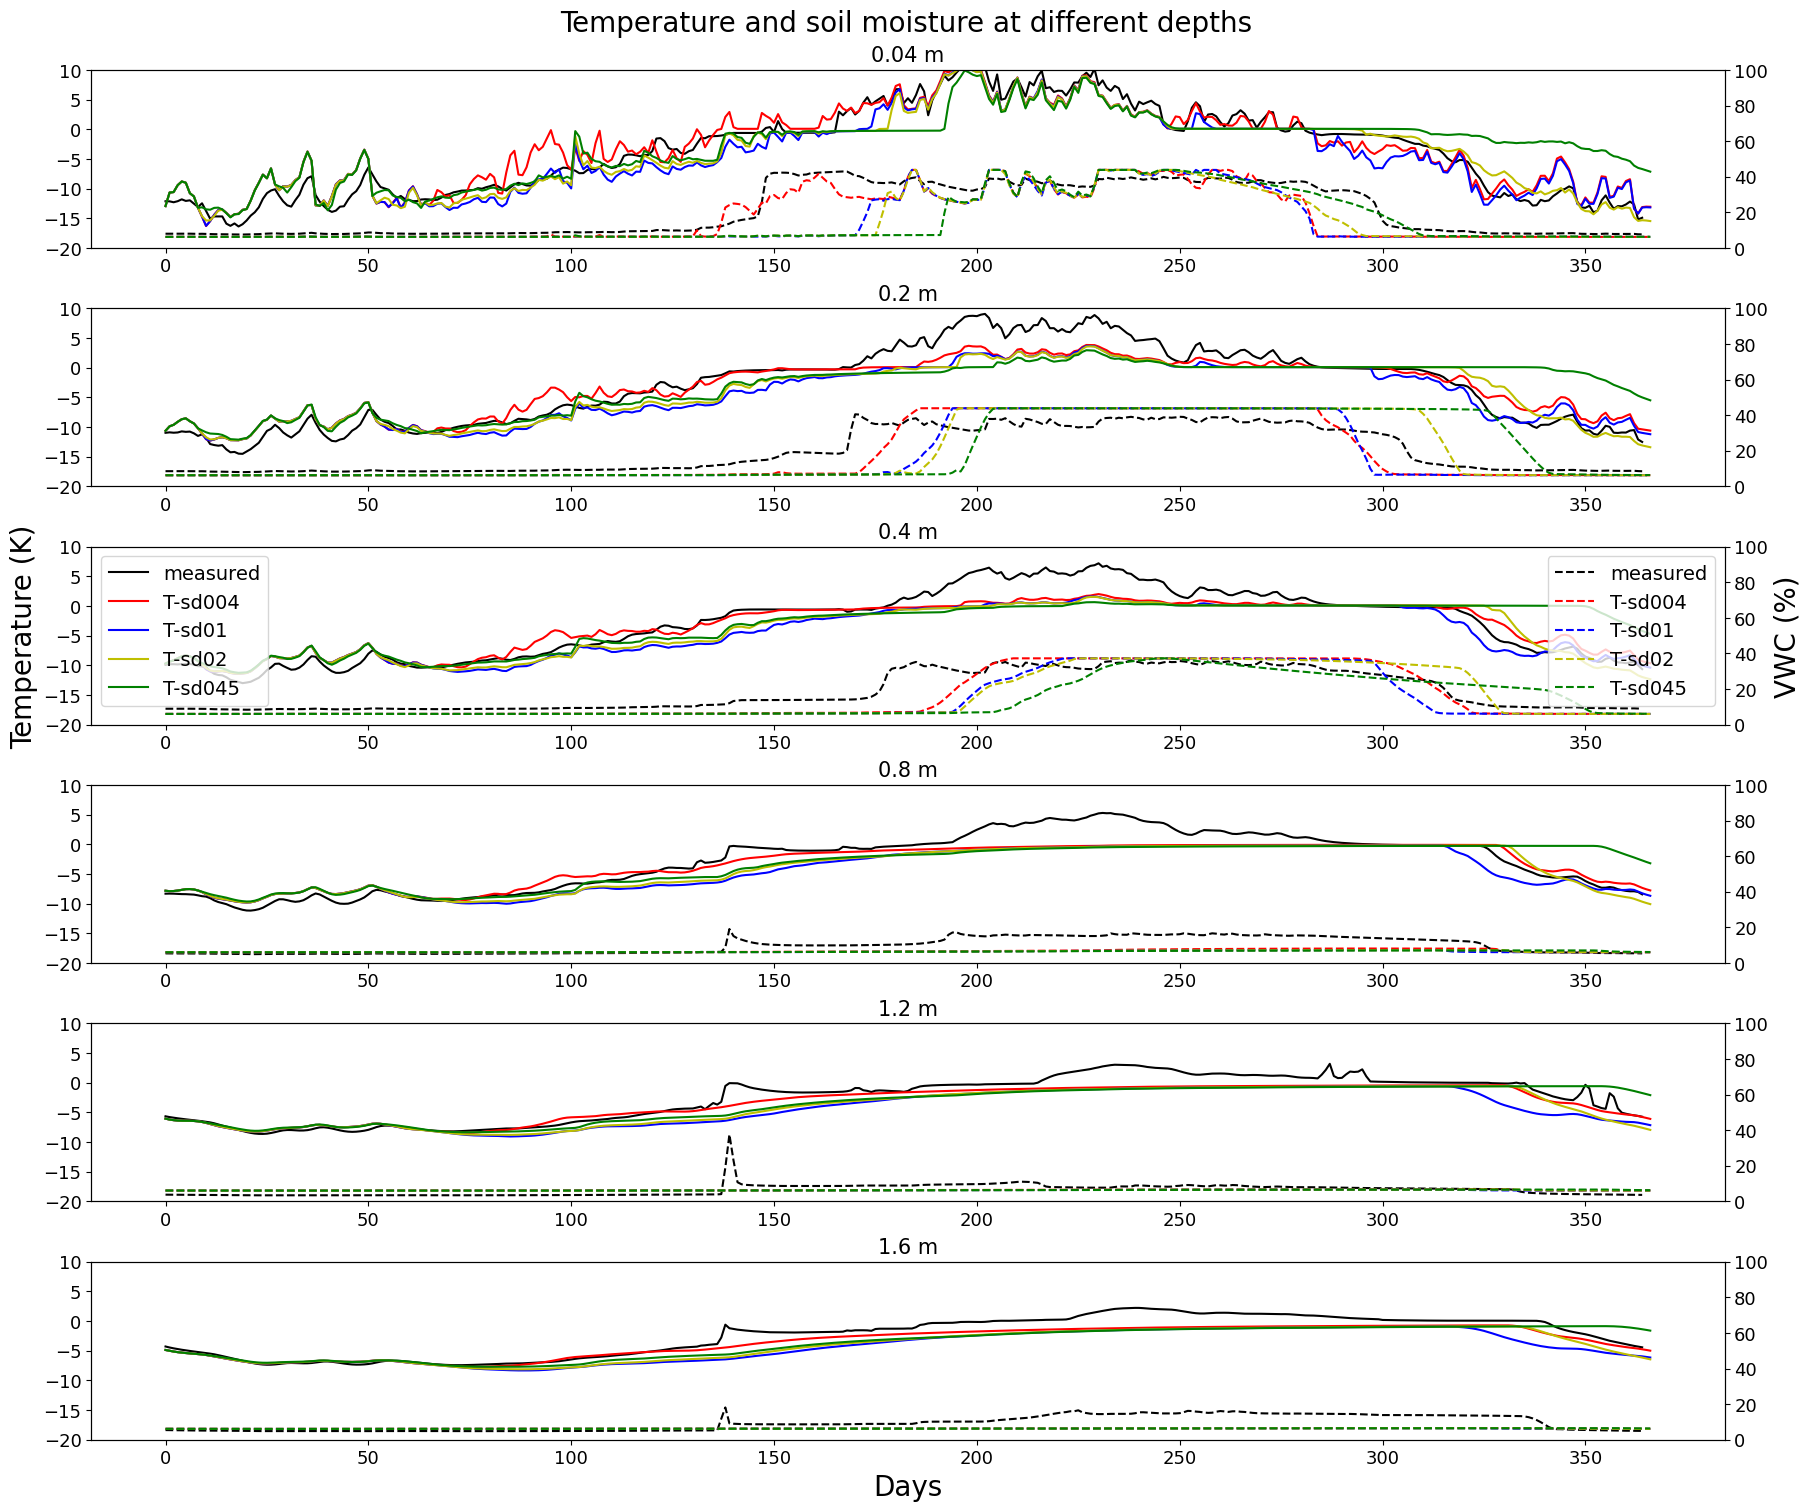

In [22]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]


for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'], 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(Case3_sd004[f'Soil temperature at - {depth} m (°C)'], 'r', label=f'T-sd004')
    locals()['f2_ax'+str(j+1)].plot(Case3_sd01[f'Soil temperature at - {depth} m (°C)'], 'b', label=f'T-sd01')
    locals()['f2_ax'+str(j+1)].plot(Case3_sd02[f'Soil temperature at - {depth} m (°C)'], 'y', label=f'T-sd02')
    locals()['f2_ax'+str(j+1)].plot(Case3_sd045[f'Soil temperature at - {depth} m (°C)'], 'g', label=f'T-sd045')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(-20,10)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'], 'k--', label=f'measured')
    ax2.plot(Case3_sd004[f'Soil moisture at - {depth} m (%)'], 'r--', label=f'T-sd004')
    ax2.plot(Case3_sd01[f'Soil moisture at - {depth} m (%)'], 'b--', label=f'T-sd01')
    ax2.plot(Case3_sd02[f'Soil moisture at - {depth} m (%)'], 'y--', label=f'T-sd02')
    ax2.plot(Case3_sd045[f'Soil moisture at - {depth} m (%)'], 'g--', label=f'T-sd045')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 37.99999999999999, 'Days')

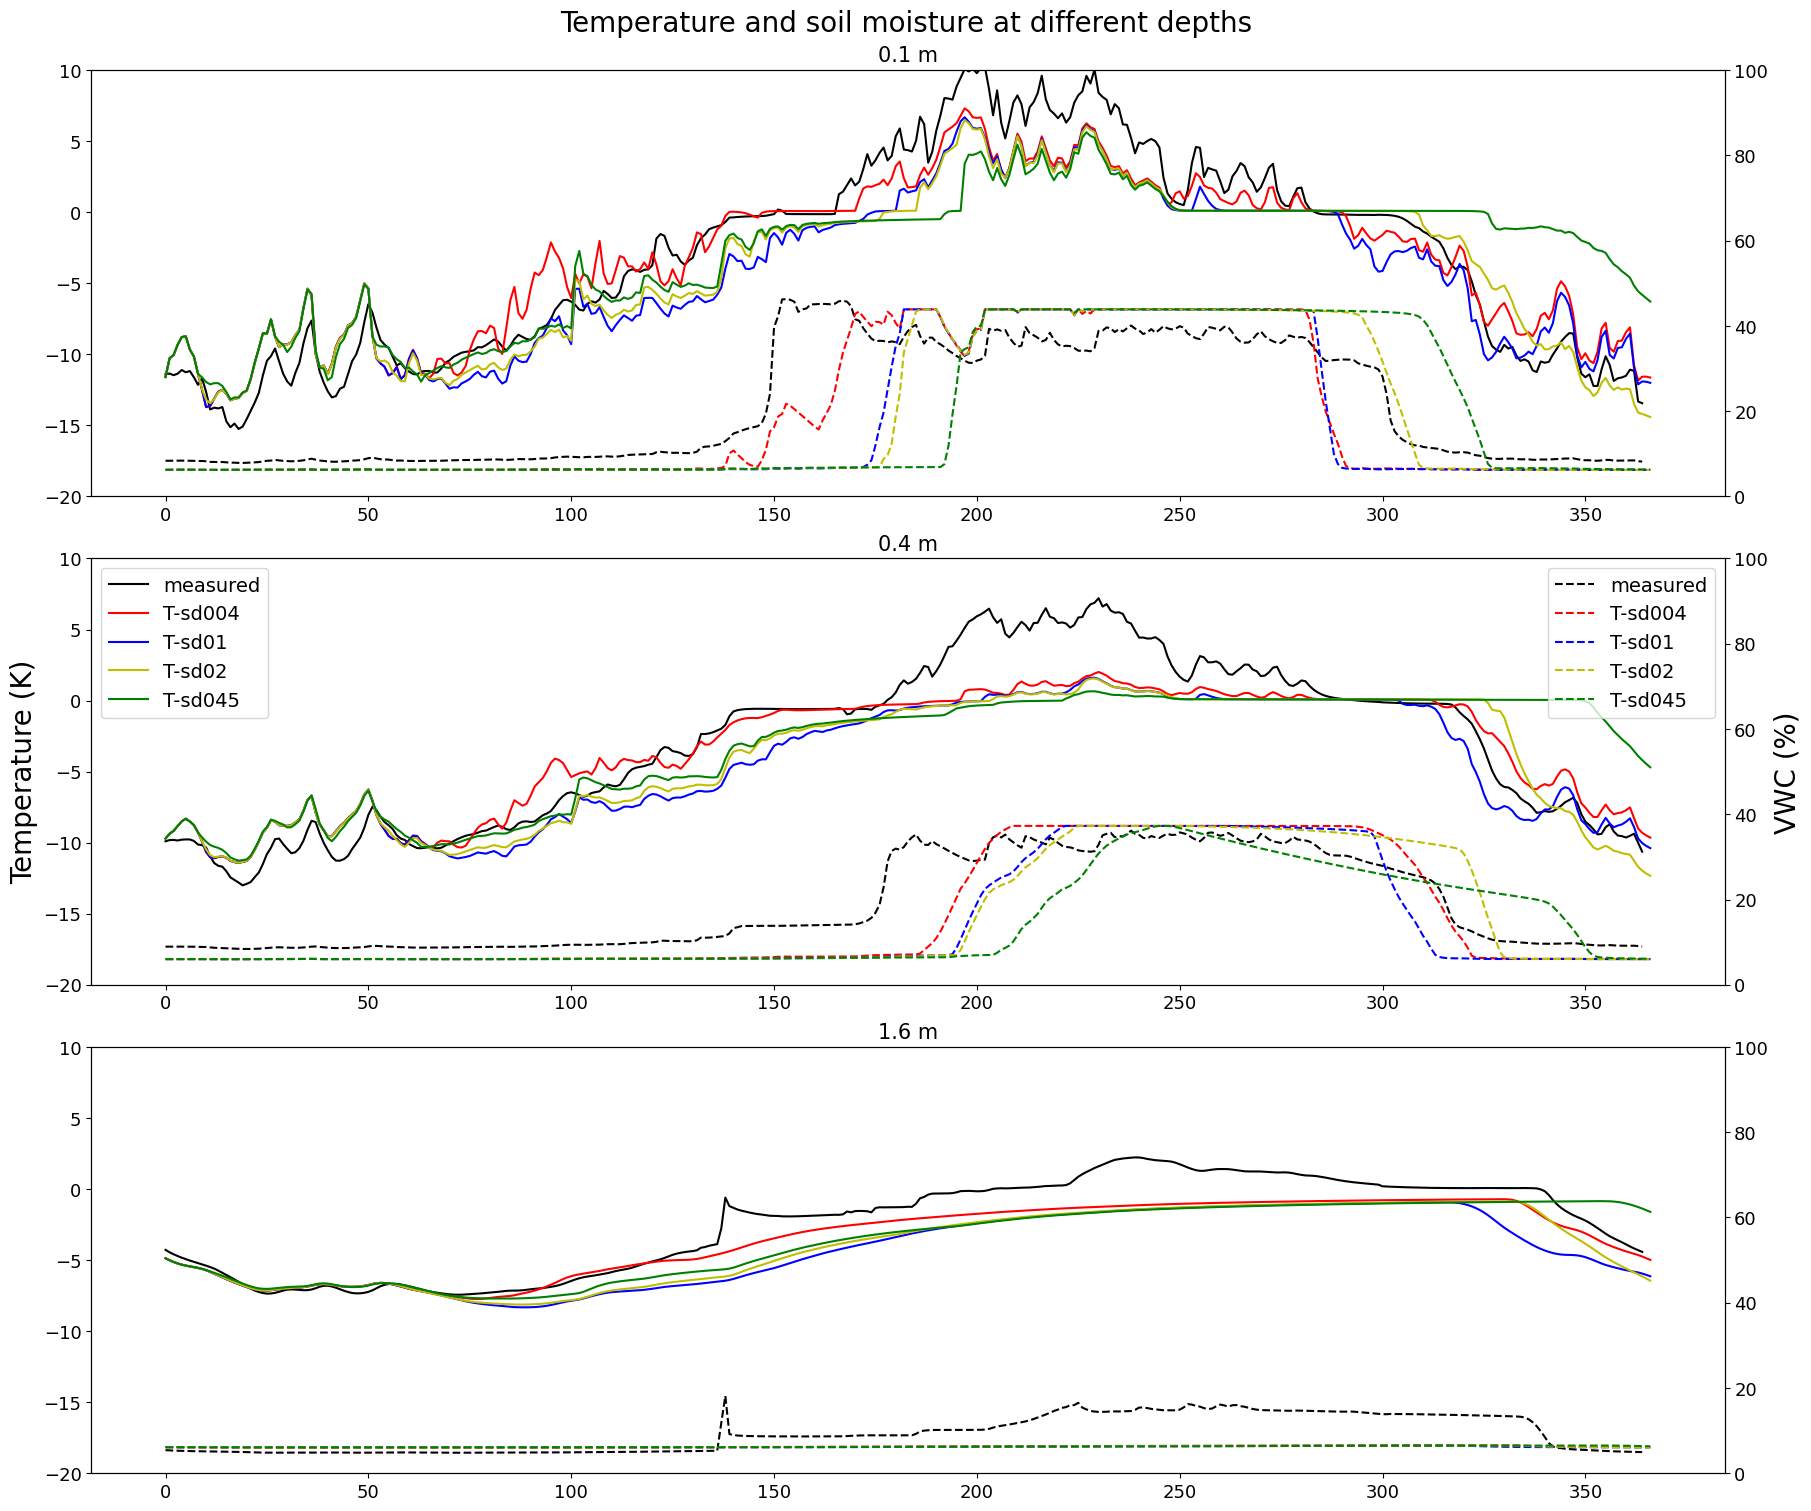

In [26]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
#f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.1,0.4,1.6]


for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'], 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(Case3_sd004[f'Soil temperature at - {depth} m (°C)'], 'r', label=f'T-sd004')
    locals()['f2_ax'+str(j+1)].plot(Case3_sd01[f'Soil temperature at - {depth} m (°C)'], 'b', label=f'T-sd01')
    locals()['f2_ax'+str(j+1)].plot(Case3_sd02[f'Soil temperature at - {depth} m (°C)'], 'y', label=f'T-sd02')
    locals()['f2_ax'+str(j+1)].plot(Case3_sd045[f'Soil temperature at - {depth} m (°C)'], 'g', label=f'T-sd045')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(-20,10)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'], 'k--', label=f'measured')
    ax2.plot(Case3_sd004[f'Soil moisture at - {depth} m (%)'], 'r--', label=f'T-sd004')
    ax2.plot(Case3_sd01[f'Soil moisture at - {depth} m (%)'], 'b--', label=f'T-sd01')
    ax2.plot(Case3_sd02[f'Soil moisture at - {depth} m (%)'], 'y--', label=f'T-sd02')
    ax2.plot(Case3_sd045[f'Soil moisture at - {depth} m (%)'], 'g--', label=f'T-sd045')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 1:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

### Calculating the RMSE value and NSE for the four cases

### RMSE

In [28]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

rmse_df_sd004 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
rmse_df_sd01 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
rmse_df_sd02 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
rmse_df_sd045 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])

In [29]:
df_obs_AWS_III.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2017-01-01,8.001889,8.352500,8.502500,8.952083,5.408938,3.765458,5.415479,-12.807778,-12.126736,-11.403750,-10.977778,-9.902153,-8.312083,-5.657743,-4.284076
1,2017-01-02,8.008944,8.363681,8.515347,8.959236,5.403771,3.747493,5.377924,-13.721104,-12.143333,-11.357708,-10.903542,-9.815208,-8.296667,-5.790653,-4.451597
2,2017-01-03,8.001986,8.356250,8.513264,8.958819,5.386264,3.732201,5.312049,-13.513736,-12.295139,-11.472361,-10.965417,-9.805000,-8.309931,-5.898486,-4.594007
3,2017-01-04,8.016035,8.365417,8.515694,8.953472,5.380111,3.718479,5.282632,-12.564931,-12.117292,-11.363750,-10.923194,-9.844306,-8.356181,-5.995306,-4.716979
4,2017-01-05,8.037118,8.386875,8.527569,8.957500,5.374840,3.706326,5.251993,-12.385111,-11.802986,-11.108819,-10.740208,-9.785764,-8.384167,-6.089104,-4.832729


In [30]:
Case3_sd004

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C),Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%)
0,0.0,692983.819430,0.0,0.000214,2.193956e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,-7.817212,-6.055535,-4.873201,6.213560,6.223199,6.231230,6.033264,6.056864,6.088084,6.117871
1,86400.0,692980.370534,0.0,0.000141,1.289223e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,-7.888179,-6.207547,-5.010842,6.230998,6.234460,6.238229,6.036846,6.055816,6.084880,6.113873
2,172800.0,692977.645762,0.0,0.000101,1.025261e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,-7.864475,-6.309861,-5.133341,6.231751,6.236622,6.240822,6.039332,6.056149,6.082788,6.110451
3,259200.0,692973.961928,0.0,0.000072,1.266469e-09,0.0,0.0,0.0,1.543208e-10,0.0,...,-7.784265,-6.373934,-5.237937,6.243085,6.244056,6.246182,6.043267,6.057316,6.081503,6.107623
4,345600.0,692969.742189,0.0,0.000044,1.197854e-09,0.0,0.0,0.0,0.000000e+00,0.0,...,-7.663987,-6.403299,-5.322610,6.249987,6.250054,6.251219,6.047451,6.059106,6.080921,6.105394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,31276800.0,692733.088633,0.0,0.000048,3.182676e-10,0.0,0.0,0.0,0.000000e+00,0.0,...,-6.747802,-5.487374,-4.552094,6.210664,6.229908,6.243828,6.050467,6.074356,6.101205,6.127885
363,31363200.0,692731.068372,0.0,0.000173,1.972422e-09,0.0,0.0,0.0,3.006961e-09,0.0,...,-7.048213,-5.610335,-4.642580,6.205712,6.221315,6.234375,6.041289,6.069058,6.098199,6.124959
364,31449600.0,692728.572811,0.0,0.000111,1.240279e-09,0.0,0.0,0.0,-4.135903e-25,0.0,...,-7.329911,-5.765145,-4.747370,6.212466,6.223392,6.233362,6.037798,6.064376,6.094550,6.121675
365,31536000.0,692726.057686,0.0,0.000075,9.475180e-10,0.0,0.0,0.0,0.000000e+00,0.0,...,-7.564271,-5.930911,-4.864043,6.212981,6.223431,6.232480,6.035701,6.060675,6.090801,6.118143


In [32]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

# Note: Case 1 and Case 2 is for 2019
# Note: Case 3 is for 2017

# Calculating the RMSE for temperature
for j, depth in enumerate(depths):
    rmse_df_sd004.iloc[j,0] = np.mean(np.power(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'] - Case3_sd004[f'Soil temperature at - {depth} m (°C)'],2))
    rmse_df_sd01.iloc[j,0] = np.mean(np.power(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'] - Case3_sd01[f'Soil temperature at - {depth} m (°C)'],2))
    rmse_df_sd02.iloc[j,0] = np.mean(np.power(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'] - Case3_sd02[f'Soil temperature at - {depth} m (°C)'],2))
    rmse_df_sd045.iloc[j,0] = np.mean(np.power(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'] - Case3_sd045[f'Soil temperature at - {depth} m (°C)'],2))
    
    rmse_df_sd004.iloc[j,1] = np.mean(np.power(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'] - Case3_sd004[f'Soil moisture at - {depth} m (%)'],2))
    rmse_df_sd01.iloc[j,1] = np.mean(np.power(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'] - Case3_sd01[f'Soil moisture at - {depth} m (%)'],2))
    rmse_df_sd02.iloc[j,1] = np.mean(np.power(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'] - Case3_sd02[f'Soil moisture at - {depth} m (%)'],2))
    rmse_df_sd045.iloc[j,1] = np.mean(np.power(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'] - Case3_sd045[f'Soil moisture at - {depth} m (%)'],2))
    

In [33]:
rmse_df_sd045

,Temperature,Moisture
0.04,14.707584,142.009587
0.10,15.483456,199.999577
0.20,16.251863,168.883044
0.40,11.566333,86.534644
0.80,7.575923,29.112094
1.20,3.610828,9.675885
1.60,3.473887,25.911866


In [34]:
rmse_df_sd02

,Temperature,Moisture
0.04,4.329096,122.365079
0.10,6.045212,129.846284
0.20,7.681921,102.696804
0.40,6.272582,64.778672
0.80,5.117764,28.084349
1.20,3.770076,9.467948
1.60,3.738738,25.823132


#### NSE (Nash Sutcliffe Efficiency Coefficient)

In [36]:
# Defining the dataframe

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

nse_df_sd004 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
nse_df_sd01 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
nse_df_sd02 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])
nse_df_sd045 = pd.DataFrame(index=depths,columns=['Temperature','Moisture'])


In [37]:
# Defining a Nash-Sutcliffe coefficient
def nse(targets, predictions):
    nse_value = (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
    return nse_value

In [38]:
# Test
nse(df_obs_AWS[f'Soil temperature at - 1.6 m (°C)'], Case3_sd01[f'Soil temperature at - 1.6 m (°C)'])

0.46553353379918927

In [39]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

# Note: Case 1 and Case 2 is for 2019
# Note: Case 3 is for 2017

# Calculating the RMSE for temperature
for j, depth in enumerate(depths):
    nse_df_sd004.iloc[j,0] = nse(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'], Case3_sd004[f'Soil temperature at - {depth} m (°C)'])
    nse_df_sd01.iloc[j,0] = nse(df_obs_AWS[f'Soil temperature at - {depth} m (°C)'], Case3_sd01[f'Soil temperature at - {depth} m (°C)'])
    nse_df_sd02.iloc[j,0] = nse(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'], Case3_sd02[f'Soil temperature at - {depth} m (°C)'])
    nse_df_sd045.iloc[j,0] = nse(df_obs_AWS_III[f'Soil temperature at - {depth} m (°C)'], Case3_sd045[f'Soil temperature at - {depth} m (°C)'])
    
    nse_df_sd004.iloc[j,1] = nse(df_obs_AWS[f'Soil moisture at - {depth} m (%)'], Case3_sd004[f'Soil moisture at - {depth} m (%)'])
    nse_df_sd01.iloc[j,1] = nse(df_obs_AWS[f'Soil moisture at - {depth} m (%)'], Case3_sd01[f'Soil moisture at - {depth} m (%)'])
    nse_df_sd02.iloc[j,1] = nse(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'], Case3_sd02[f'Soil moisture at - {depth} m (%)'])
    nse_df_sd045.iloc[j,1] = nse(df_obs_AWS_III[f'Soil moisture at - {depth} m (%)'], Case3_sd045[f'Soil moisture at - {depth} m (%)'])


In [40]:
nse_df_sd045

,Temperature,Moisture
0.04,0.72517,0.2899
0.10,0.678723,-0.009048
0.20,0.616087,-0.087639
0.40,0.640064,0.27281
0.80,0.669936,-0.446139
1.20,0.738234,0.040118
1.60,0.672169,-0.451445


In [41]:
nse_df_sd02

,Temperature,Moisture
0.04,0.919105,0.38813
0.10,0.874564,0.344893
0.20,0.818532,0.338613
0.40,0.804802,0.455635
0.80,0.777032,-0.395086
1.20,0.72669,0.060746
1.60,0.647175,-0.446474


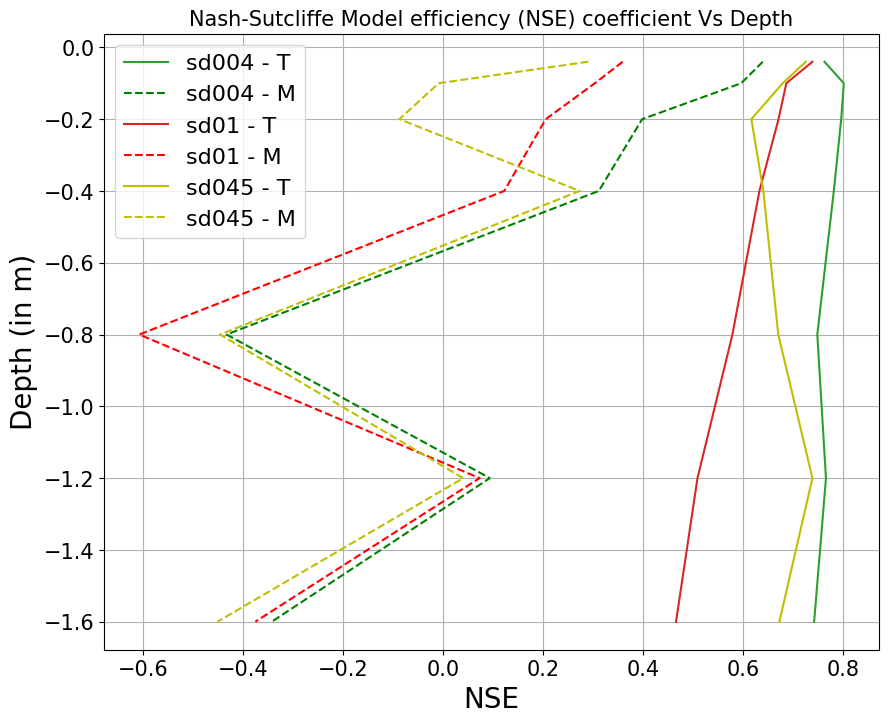

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))

#plt.figure(figsize=(20, 12))

# Case 1
ax.plot(nse_df_sd004.iloc[:,0], -nse_df_sd004.index,'tab:green', label=f'sd004 - T')
ax.plot(nse_df_sd004.iloc[:,1], -nse_df_sd004.index,'g--',label=f'sd004 - M')

# Case 2
ax.plot(nse_df_sd01.iloc[:,0], -nse_df_sd004.index,'tab:red', label=f'sd01 - T')
ax.plot(nse_df_sd01.iloc[:,1], -nse_df_sd004.index,'r--',label=f'sd01 - M')

# Case 3
#ax.plot(nse_df_sd02.iloc[:,0], -nse_df_sd004.index,'tab:blue', label=f'Case 3 - T')
#ax.plot(nse_df_sd02.iloc[:,1], -nse_df_sd004.index,'b--',label=f'Case 3 - M')

# Case 3 ces
ax.plot(nse_df_sd045.iloc[:,0], -nse_df_sd004.index,'y', label=f'sd045 - T')
ax.plot(nse_df_sd045.iloc[:,1], -nse_df_sd004.index,'y--',label=f'sd045 - M')


#for i, name in enumerate(cf_names):
#    ax.plot(locals()[f'obj_fn_{i+1}']['total_phi'],label=f'{name}')
    
ax.set_title('Nash-Sutcliffe Model efficiency (NSE) coefficient Vs Depth', fontsize=15)
ax.set_ylabel('Depth (in m)', fontsize=20)
ax.set_xlabel('NSE', fontsize=20)
ax.grid(True)
ax.legend(fontsize=16)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

In [46]:
nse_df_sd004.mean()

Temperature    0.770696
Moisture       0.180156
dtype: float64

In [47]:
nse_df_sd01.mean()

Temperature    0.611333
Moisture       0.011240
dtype: float64

In [48]:
nse_df_sd02.mean()

Temperature    0.795414
Moisture       0.106637
dtype: float64

In [49]:
nse_df_sd045.mean()

Temperature    0.677198
Moisture      -0.055920
dtype: float64